In [4]:
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

--2023-12-07 20:01:19--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.207, 74.125.203.207, 64.233.187.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.23.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M  31.5MB/s    in 7.8s    

2023-12-07 20:01:28 (27.8 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [5]:
!tar -xzvf "flower_photos.tgz" -C "." > xx

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
model = tf.keras.applications.ResNet50(weights = 'imagenet')
print('model has',len(model.layers),'layers')
model.summary()

model has 177 layers
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                  

In [4]:
import cv2
import os
def load_img(indir):
    samples = []
    labels = []
    for class_dir in os.listdir(indir):
        the_class = class_dir
        for file in os.listdir(indir+'/'+class_dir):
            image = cv2.imread("{}/{}/{}".format(indir,class_dir,file))
            image = cv2.resize(image, (224,224))
            samples.append(image)
            labels.append(the_class)
    samples = np.array(samples)
    labels = np.array(labels)
    return samples,labels
samples, labels = load_img('flower_photos')
print('loaded',len(samples),' samples')

print('classes',set(labels))

loaded 3670  samples
classes {'sunflowers', 'daisy', 'tulips', 'roses', 'dandelion'}


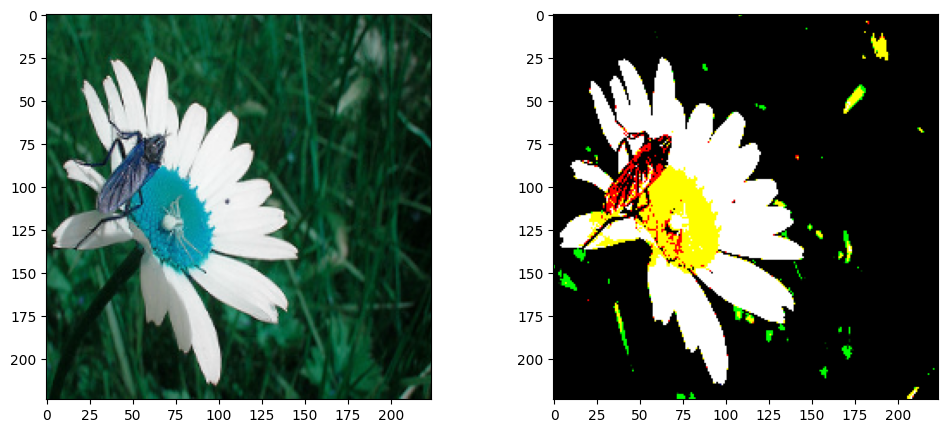

In [5]:
org_samples = samples[:]
samples = tf.keras.applications.resnet50.preprocess_input(samples)

## compare original and preprocessed
fig,(org_plot,prep_plot) = plt.subplots(1,2, figsize=(12, 5))
org_plot.imshow(org_samples[1])
prep_plot.imshow(samples[1])

In [6]:
predictions = model.predict(samples)

115/115 [==============================] - 706s 6s/step


In [7]:
top3 = tf.keras.applications.resnet50.decode_predictions(predictions, top = 3)
for i in range(len(samples)):
#    print(labels[i],'->',top3[i])

## Pretty version
   print("{} -> ({}:{:.2f}, {}:{:.2f}, {}:{:.2f})".format(labels[i],
                top3[i][0][1],top3[i][0][2],
                top3[i][1][1],top3[i][1][2],
                top3[i][2][1],top3[i][2][2]))

daisy -> (daisy:0.96, binder:0.02, doormat:0.00)
daisy -> (daisy:0.98, pinwheel:0.01, cabbage_butterfly:0.00)
daisy -> (daisy:0.99, cabbage_butterfly:0.00, peacock:0.00)
daisy -> (pinwheel:0.48, hair_slide:0.36, daisy:0.14)
daisy -> (plastic_bag:0.27, paper_towel:0.25, shower_cap:0.08)
daisy -> (daisy:0.78, shower_curtain:0.10, hair_slide:0.03)
daisy -> (daisy:1.00, bolo_tie:0.00, peacock:0.00)
daisy -> (daisy:0.98, peacock:0.01, mushroom:0.00)
daisy -> (daisy:0.95, fountain:0.01, peacock:0.01)
daisy -> (daisy:0.95, bolo_tie:0.01, lycaenid:0.00)
daisy -> (pinwheel:0.40, daisy:0.30, doormat:0.04)
daisy -> (daisy:0.99, pinwheel:0.00, pot:0.00)
daisy -> (daisy:0.61, maillot:0.03, shower_curtain:0.03)
daisy -> (hair_slide:0.27, scorpion:0.12, peacock:0.11)
daisy -> (daisy:0.96, sea_anemone:0.02, vase:0.01)
daisy -> (pinwheel:0.89, daisy:0.02, Shetland_sheepdog:0.01)
daisy -> (daisy:0.88, jay:0.06, pinwheel:0.02)
daisy -> (hair_slide:0.21, binder:0.12, pinwheel:0.07)
daisy -> (bubble:0.83, 

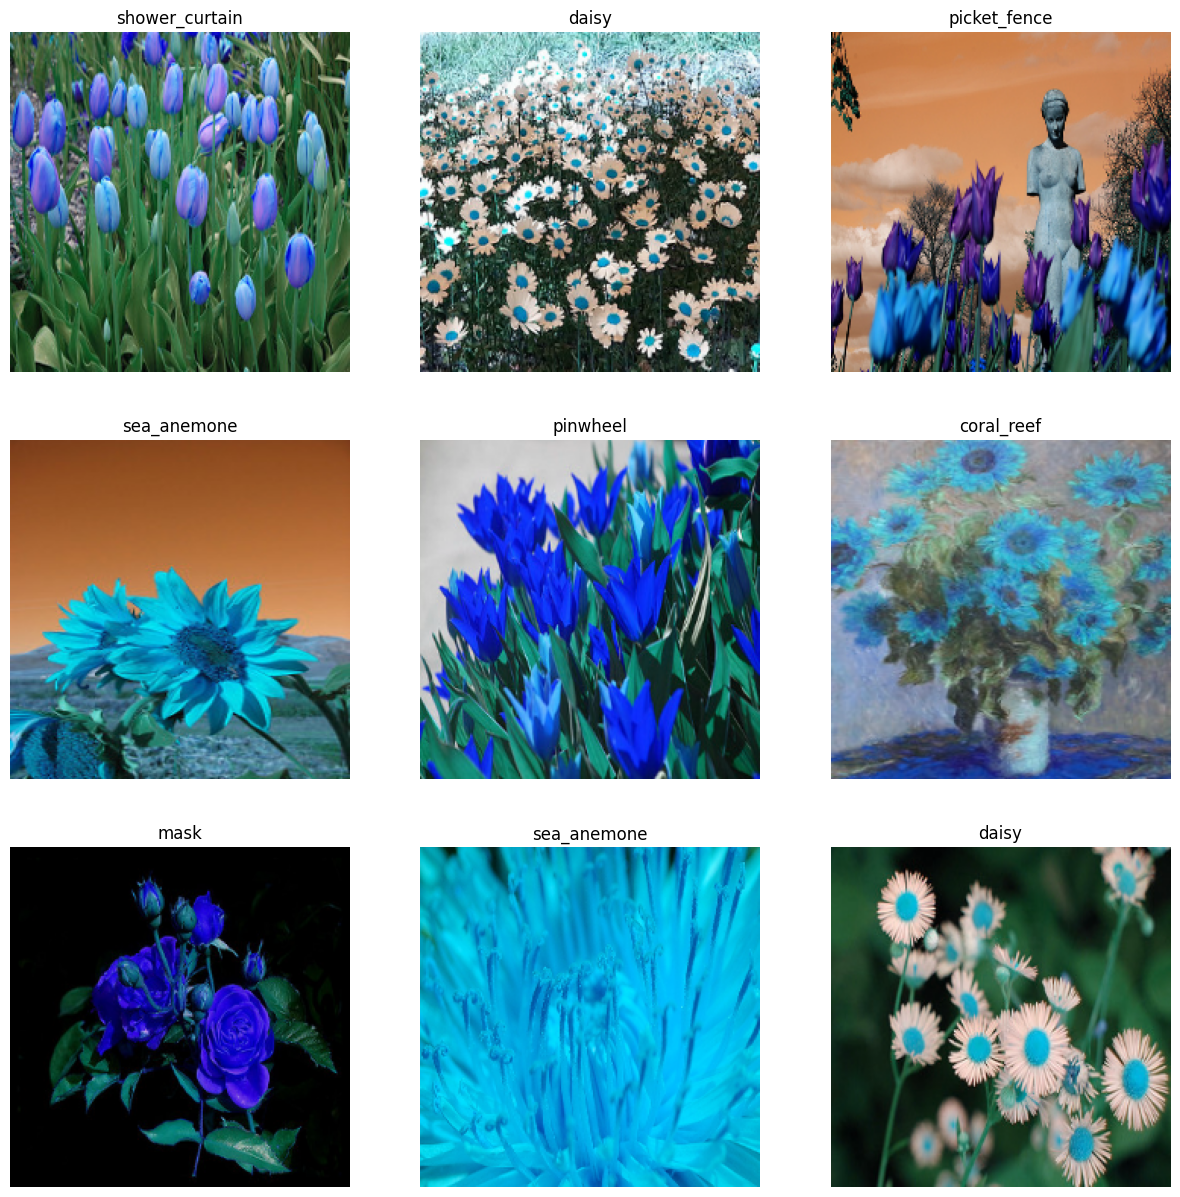

In [8]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(15, 15))
for i in range(9):
    n = random.randrange(len(samples))
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(org_samples[n])
    plt.title(tf.keras.applications.resnet50.decode_predictions(predictions, top = 1)[n][0][1])
    plt.axis("off")

In [9]:
base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False)
print("Layers:",len(base_model.layers))
#base_model.summary()

Layers: 175


In [10]:
print("Full model:",len(model.layers),'layers')
for i,layer in enumerate(model.layers[:3]):
    print("  ",i, layer.name, type(layer))
print('  ...')
for i,layer in enumerate(model.layers[171:]):
    print("  ",i+171, layer.name, type(layer))

print()
print("Base model:",len(base_model.layers),'layers')
for i,layer in enumerate(base_model.layers[:3]):
    print("  ",i, layer.name, type(layer))
print('  ...')
for i,layer in enumerate(base_model.layers[171:]):
    print("  ",i+171, layer.name, type(layer))

Full model: 177 layers
   0 input_1 <class 'keras.src.engine.input_layer.InputLayer'>
   1 conv1_pad <class 'keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D'>
   2 conv1_conv <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
  ...
   171 conv5_block3_3_conv <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
   172 conv5_block3_3_bn <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>
   173 conv5_block3_add <class 'keras.src.layers.merging.add.Add'>
   174 conv5_block3_out <class 'keras.src.layers.core.activation.Activation'>
   175 avg_pool <class 'keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D'>
   176 predictions <class 'keras.src.layers.core.dense.Dense'>

Base model: 175 layers
   0 input_2 <class 'keras.src.engine.input_layer.InputLayer'>
   1 conv1_pad <class 'keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D'>
   2 conv1_conv <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
  ...
   171 conv5_bloc

In [11]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
last_layer = tf.keras.layers.Dense(5, activation = 'softmax')(x)

model = tf.keras.models.Model(inputs = base_model.input, outputs = last_layer)

print("Combined model:",len(model.layers),'layers')

Combined model: 181 layers


In [12]:
for layer in model.layers[:175]:
    layer.trainable = False

for layer in model.layers[175:]:
    layer.trainable = True

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() # encoder
intlabels = encoder.fit_transform(labels)
labels = tf.keras.utils.to_categorical(intlabels)
print("One-hot labels",labels.shape)

One-hot labels (3670, 5)


In [14]:
labels.shape

(3670, 5)

In [15]:
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
print(samples.shape)
import sklearn.model_selection
(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples,labels,
                test_size=0.5
                #random_state=42
                )
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

checkpt = ModelCheckpoint (filepath='resnet50_model.h5', save_best_only=True)
estopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

EPOCHS = 5
H = model.fit(trainSamples, trainLabels, epochs=EPOCHS, batch_size=10, validation_data=(testSamples,testLabels),
             callbacks = [estopping,checkpt])
print("Done")

(3670, 224, 224, 3)
Epoch 1/5
184/184 [==============================] - ETA: 0s - loss: 0.6915 - accuracy: 0.7602

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


184/184 [==============================] - 735s 4s/step - loss: 0.6915 - accuracy: 0.7602 - val_loss: 0.4396 - val_accuracy: 0.8610
Epoch 2/5
184/184 [==============================] - 656s 4s/step - loss: 0.3375 - accuracy: 0.8959 - val_loss: 0.3944 - val_accuracy: 0.8725
Epoch 3/5
184/184 [==============================] - 645s 4s/step - loss: 0.2335 - accuracy: 0.9188 - val_loss: 0.4693 - val_accuracy: 0.8610
Epoch 4/5
184/184 [==============================] - 642s 3s/step - loss: 0.1715 - accuracy: 0.9406 - val_loss: 0.8459 - val_accuracy: 0.8501
Epoch 5/5
184/184 [==============================] - 652s 4s/step - loss: 0.1571 - accuracy: 0.9482 - val_loss: 0.5800 - val_accuracy: 0.8708
Done


In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
testResults = model.predict(testSamples)

print(confusion_matrix(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
print(classification_report(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
print("CNN Accuracy: {:.2f}".format(accuracy_score(testLabels.argmax(axis=1), testResults.argmax(axis=1))))
print("Cohen's Kappa: {:.2f}".format(cohen_kappa_score(testLabels.argmax(axis=1), testResults.argmax(axis=1))))

58/58 [==============================] - 335s 6s/step
[[264  16   8  17   3]
 [  7 387   5  32   2]
 [  2   4 301  13   8]
 [  2   2   4 337   0]
 [  7   4  70  31 309]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.89       308
           1       0.94      0.89      0.91       433
           2       0.78      0.92      0.84       328
           3       0.78      0.98      0.87       345
           4       0.96      0.73      0.83       421

    accuracy                           0.87      1835
   macro avg       0.88      0.88      0.87      1835
weighted avg       0.88      0.87      0.87      1835

CNN Accuracy: 0.87
Cohen's Kappa: 0.84
